In [16]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [17]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [18]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [19]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [20]:
df=df.drop('Unnamed: 0',axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Graphical Representation

<AxesSubplot:xlabel='TV', ylabel='Density'>

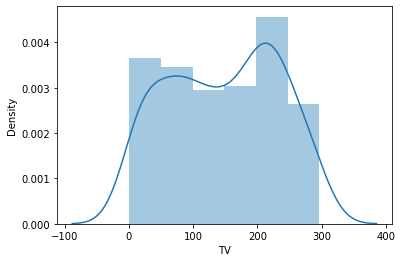

In [24]:
sns.distplot(df['TV'],kde=True)

<AxesSubplot:xlabel='radio', ylabel='Density'>

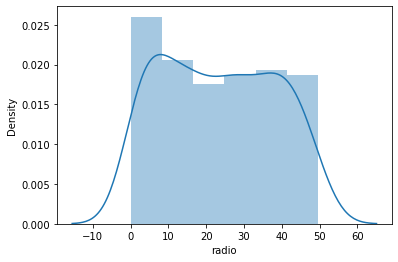

In [26]:
sns.distplot(df['radio'],kde=True)

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

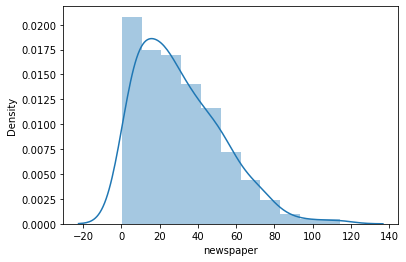

In [27]:
sns.distplot(df['newspaper'],kde=True)

<AxesSubplot:xlabel='sales', ylabel='Density'>

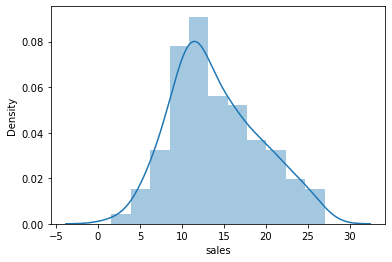

In [28]:
sns.distplot(df['sales'],kde=True)

In [29]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

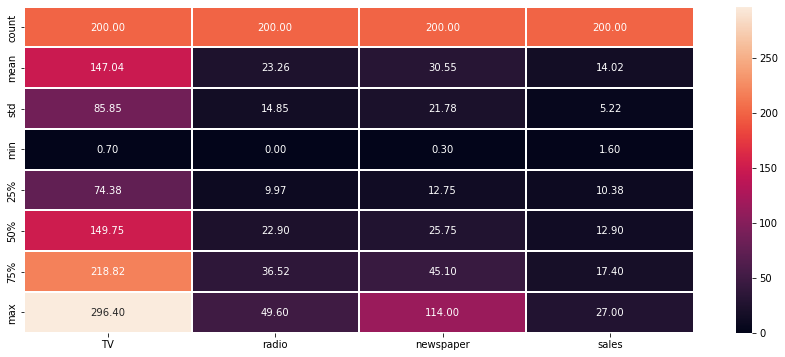

In [35]:
plt.figure(figsize=(15,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='white',fmt='0.2f')

In [31]:
dfcor=df.corr()
dfcor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

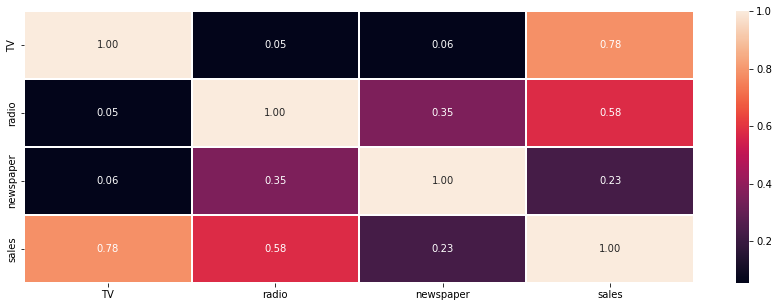

In [34]:
plt.figure(figsize=(15,5))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='white',fmt='0.2f')

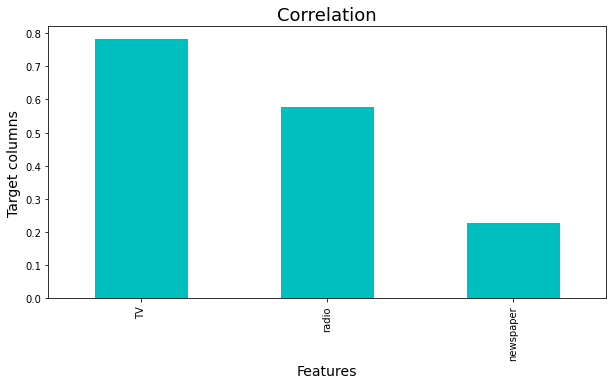

In [39]:
plt.figure(figsize=(10,5))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target columns',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [40]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# To Check Outlier

In [41]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:>

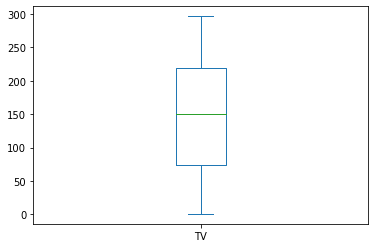

In [50]:
df['TV'].plot.box()

<AxesSubplot:>

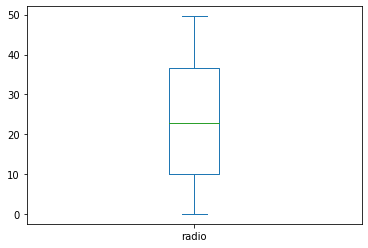

In [49]:
df['radio'].plot.box()

<AxesSubplot:>

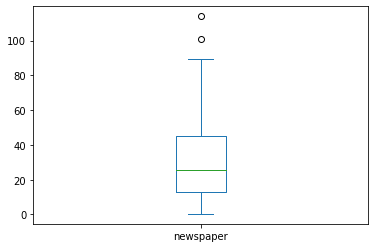

In [48]:
df['newspaper'].plot.box()

We have found outliers in newspaper

# Removal of Outliers.

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,1.197376,1.082808,0.669579,0.696046
2,1.516155,1.528463,1.783549,0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,0.841614,1.281802,0.215683
...,...,...,...,...
195,1.270941,1.321031,0.771217,1.234053
196,0.617035,1.240003,1.033598,0.830548
197,0.349810,0.942899,1.111852,0.234898
198,1.594565,1.265121,1.640850,2.205347


In [52]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [53]:
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [54]:
df.shape

(200, 4)

In [55]:
df_new.shape

(198, 4)

In [56]:
Data_loss=((200-198)/200*100)
Data_loss

1.0

Outliers is Removed.

# Separting the Columns into Feature & Target

In [57]:
x=df.drop('sales',axis=1)
y=df['sales']

In [58]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [59]:
for i in range(0,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.9067114990146383
At random state 0,the testing accuracy is:0.8601145185017868


At random state 1,the training accuracy is:0.8959372632325174
At random state 1,the testing accuracy is:0.8927605914615385


At random state 2,the training accuracy is:0.9151707412454462
At random state 2,the testing accuracy is:0.7575894500772719


At random state 3,the training accuracy is:0.8930288385772915
At random state 3,the testing accuracy is:0.9138375011080567


At random state 4,the training accuracy is:0.8911672911176578
At random state 4,the testing accuracy is:0.9085774752313167


At random state 5,the training accuracy is:0.8956962280033929
At random state 5,the testing accuracy is:0.8984204533332627


At random state 6,the training accuracy is:0.8915418760966582
At random state 6,the testing accuracy is:0.922433347392203


At random state 7,the training accuracy is:0.8929164670647455
At random state 7,the testing accuracy is:0.9095550600904052


A

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
predict_test=lr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

89.27605914615386


In [62]:
predict_train=lr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

89.59372632325174


# Cross Validation of the Model

In [63]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for the {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.8908473589845056 and accuracy score for training is 0.8959372632325174 and accuracy score  for the 0.8927605914615385


At cross fold(j) the cv score is 0.8916464591145559 and accuracy score for training is 0.8959372632325174 and accuracy score  for the 0.8927605914615385


At cross fold(j) the cv score is 0.8900070660549507 and accuracy score for training is 0.8959372632325174 and accuracy score  for the 0.8927605914615385


At cross fold(j) the cv score is 0.8871063495438436 and accuracy score for training is 0.8959372632325174 and accuracy score  for the 0.8927605914615385


At cross fold(j) the cv score is 0.8899208882186672 and accuracy score for training is 0.8959372632325174 and accuracy score  for the 0.8927605914615385


At cross fold(j) the cv score is 0.8859930219823539 and accuracy score for training is 0.8959372632325174 and accuracy score  for the 0.8927605914615385


At cross fold(j) the cv score is 0.8826686689919152 and accuracy score

since the number of folds dont have such impact on the accuracy and cv_score . so cv=5 is selected.

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

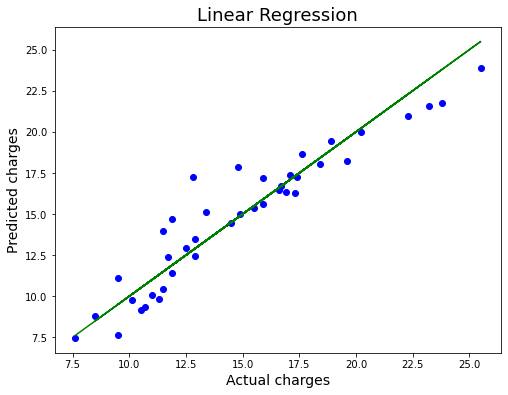

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predict_test,color='b')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [69]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.8899191365872575

# Ensemble Technique

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [72]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 97.57928725708484
Cross Val Score: 97.56011625304772


We are getting model accuracy and cross validation both 97.5% and 97.5% respectively. hence model performance is Good.

# Reciever Operating Characteristic(ROC)

In [73]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score 


In [74]:
#Import some data
iris = datasets.load_iris()
X=iris.data
Y=iris.target

In [77]:
#Binarize the output
Y=label_binarize(Y,classes=[0,1,2])
n_classes=Y.shape[1]

In [78]:
# Add noisy feautures to make the problem harder
random_state=np.random.RandomState(42)
n_samples,n_features=X.shape
X=np.c_[X,random_state.randn(n_samples,200*n_features)]

In [79]:
#shuffle and split training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.5,random_state=42)

In [80]:
#learn to predict each class against the other
classifier=OneVsRestClassifier(svm.SVC(kernel='linear',probability=True,random_state=random_state))
Y_score=classifier.fit(X_train,Y_train).decision_function(X_test)

In [81]:
# Compute ROC curve and ROC area for each class 
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(Y_test[:,i],Y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

In [82]:
# Compute micro-average ROC curve and ROC area
fpr["micro"],tpr["micro"],_=roc_curve(Y_test.ravel(),Y_score.ravel())
roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])

Plot of ROC curve for a specific class

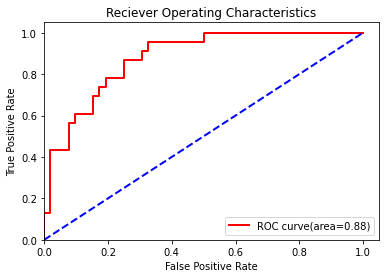

In [83]:
plt.figure()
lw=2
plt.plot(fpr[2],tpr[2],color='r',
        lw=lw,label='ROC curve(area=%0.2f)'%roc_auc[2])
plt.plot([0,1],[0,1],color='b',lw=lw,linestyle='--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

In [84]:
Y_prob=classifier.predict_proba(X_test)
macro_roc_auc_ovo=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="macro")
weighted_roc_auc_ovo=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="weighted")
macro_roc_auc_ovr=roc_auc_score(Y_test,Y_prob,multi_class="ovr",average="macro")
weighted_roc_auc_ovr=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="weighted")

In [85]:
print("One-vs-One ROC AUC scores:\n{:.5f}(macro),\n{:.5f}"
     "(weighted by prevalance)"
     .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-One ROC AUC scores:\n{:.5f}(macro),\n{:.5f}"
     "(weighted by prevalance)"
     .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.75030(macro),
0.76386(weighted by prevalance)
One-vs-One ROC AUC scores:
0.75030(macro),
0.76386(weighted by prevalance)


# Saving the Model

In [86]:
import pickle
filename='Advertising Sale Channel Prediction.csv.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [87]:
loaded_model=pickle.load(open('Advertising Sale Channel Prediction.csv.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9757928725708485


In [89]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,23.211,15.864,9.573,13.859,16.033,24.834,17.275,13.928,10.936,16.254,...,23.12,12.165,16.471,12.53,20.198,15.166,11.898,11.143,22.174,6.943
Original,23.211,15.864,9.573,13.859,16.033,24.834,17.275,13.928,10.936,16.254,...,23.12,12.165,16.471,12.53,20.198,15.166,11.898,11.143,22.174,6.943
